In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [3]:
df_ksearch_date = pd.read_csv("Keyword_search_by_date.csv")
df_Nvisitors_Date = pd.read_csv("Number_of_visitors_date.csv")
df_search_trend = pd.read_csv("Trend_search_date.csv")

In [35]:
df_ksearch_date[:5]

,_id,destination_type,destination_search,region,std_year,std_month,std_year_month
0,65e92d9cbb908e26c804031e,전체,1937279,강원,2020,1,202001
1,65e92d9cbb908e26c804031f,전체,1395025,강원,2020,2,202002
2,65e92d9cbb908e26c8040320,전체,1295467,강원,2020,3,202003
3,65e92d9cbb908e26c8040321,전체,1592147,강원,2020,4,202004
4,65e92d9cbb908e26c8040322,전체,2286676,강원,2020,5,202005


In [161]:
df_ksearch_date['destination_type'].value_counts()

destination_type
전체       816
숙박       816
음식       816
기타관광     816
쇼핑       816
문화관광     816
역사관광     816
자연관광     816
체험관광     816
레저스포츠    816
Name: count, dtype: int64

In [149]:
df_Nvisitors_Date[:5]

,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region,season
12,65e932a1bb908e26c804493a,운송업,202010,2020,10,146418,강원,가을
13,65e932a1bb908e26c804493b,운송업,202008,2020,8,101424,강원,여름
14,65e932a1bb908e26c804493c,여행업,202010,2020,10,217630,강원,가을
15,65e932a1bb908e26c804493d,숙박업,202010,2020,10,13753657,강원,가을
16,65e932a1bb908e26c804493e,여행업,202009,2020,9,120133,강원,가을


In [151]:
df_Nvisitors_Date['industry_major_cate'].value_counts()

industry_major_cate
운송업       816
숙박업       816
여가서비스업    816
식음료업      816
쇼핑업       816
여행업       797
Name: count, dtype: int64

In [92]:
df_search_trend[:5]

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740


In [152]:
df_search_trend['tour_trend'].value_counts()

tour_trend
레포츠      816
휴식/힐링    816
기타       816
미식       816
체험       816
Name: count, dtype: int64

In [167]:
df_search_trend['region'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

## 전처리

In [37]:
df_ksearch_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8160 entries, 0 to 8159
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 8160 non-null   object
 1   destination_type    8160 non-null   object
 2   destination_search  8160 non-null   int64 
 3   region              8160 non-null   object
 4   std_year            8160 non-null   int64 
 5   std_month           8160 non-null   int64 
 6   std_year_month      8160 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 446.4+ KB


In [38]:
df_ksearch_date.isnull().sum()

_id                   0
destination_type      0
destination_search    0
region                0
std_year              0
std_month             0
std_year_month        0
dtype: int64

In [39]:
df_Nvisitors_Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  5693 non-null   object
 1   industry_major_cate  5693 non-null   object
 2   std_year_month       5693 non-null   int64 
 3   std_year             5693 non-null   int64 
 4   std_month            5693 non-null   int64 
 5   consumption_amount   5693 non-null   int64 
 6   region               5693 non-null   object
dtypes: int64(4), object(3)
memory usage: 311.5+ KB


In [40]:
df_Nvisitors_Date.isnull().sum()

_id                    0
industry_major_cate    0
std_year_month         0
std_year               0
std_month              0
consumption_amount     0
region                 0
dtype: int64

In [135]:
df_search_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             4080 non-null   object
 1   region          4080 non-null   object
 2   std_year_month  4080 non-null   int64 
 3   std_year        4080 non-null   int64 
 4   std_month       4080 non-null   int64 
 5   tour_trend      4080 non-null   object
 6   num_mention     4080 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 223.3+ KB


In [136]:
df_search_trend.isnull().sum()

_id               0
region            0
std_year_month    0
std_year          0
std_month         0
tour_trend        0
num_mention       0
dtype: int64

- 결측치 없음

## EDA

### 제안 1 : 계절별 카테고리 검색량/소비량 평균 비교

- 문제 정의 : 카테고리의 계절별 검색 추이를 시각화하여 계절적 패턴을 확인
- 배경 : 특정 키워드의 검색량이 계절에 따라 변화할 수 있다.
- 예를 들어 여름에는 레저스포츠 관련 키워드의 검색량이 증가할 것으로 예상된다. 이를 통해 계절별 카테고리 검색 추이와 계절적 패턴을 이해할 수 있다.

In [94]:
seasons = {
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
}
df_ksearch_date['season'] = df_ksearch_date['std_month'].map(seasons)
df_Nvisitors_Date['season'] = df_Nvisitors_Date['std_month'].map(seasons)

In [95]:
df_ksearch_date

,_id,destination_type,destination_search,region,std_year,std_month,std_year_month,season
0,65e92d9cbb908e26c804031e,전체,1937279,강원,2020,1,202001,겨울
1,65e92d9cbb908e26c804031f,전체,1395025,강원,2020,2,202002,겨울
2,65e92d9cbb908e26c8040320,전체,1295467,강원,2020,3,202003,봄
3,65e92d9cbb908e26c8040321,전체,1592147,강원,2020,4,202004,봄
4,65e92d9cbb908e26c8040322,전체,2286676,강원,2020,5,202005,봄
...,...,...,...,...,...,...,...,...
8155,65e92d9dbb908e26c80422f9,문화관광,80761,충북,2023,12,202312,겨울
8156,65e92d9dbb908e26c80422fa,역사관광,20072,충북,2023,12,202312,겨울
8157,65e92d9dbb908e26c80422fb,자연관광,25920,충북,2023,12,202312,겨울
8158,65e92d9dbb908e26c80422fc,체험관광,11141,충북,2023,12,202312,겨울


In [96]:
df_ksearch_date = df_ksearch_date.query('destination_type != "전체"')
df_Nvisitors_Date = df_Nvisitors_Date.query('industry_major_cate != "전체"')

In [97]:
# 계절별 데이터 확인
df_ksearch_winter = df_ksearch_date.query('season == "겨울"')
df_ksearch_spring = df_ksearch_date.query('season == "봄"')
df_ksearch_summer = df_ksearch_date.query('season == "여름"')
df_ksearch_fall = df_ksearch_date.query('season == "가을"')

#### 각 계절별 카테고리 검색량/소비량 평균 비교 그래프

In [99]:
grouped = df_ksearch_date.groupby(['destination_type', 'season'])
cate_season_mean = grouped['destination_search'].mean().unstack()
cate_season_mean

season,가을,겨울,봄,여름
destination_type,,,,
기타관광,219165.014706,167629.156863,183180.245098,198967.740196
레저스포츠,127843.735294,63300.593137,114445.455882,125152.151961
문화관광,258831.681373,170681.436275,223161.946078,244138.156863
쇼핑,298700.142157,258901.019608,262200.465686,273296.519608
숙박,222473.593137,173472.117647,179602.446078,251251.867647
역사관광,74220.960784,43614.245098,63757.852941,57132.137255
음식,822748.235294,652162.318627,758441.828431,898512.779412
자연관광,125356.789216,78358.107843,100928.504902,134349.700980
체험관광,11581.617647,9330.294118,9801.578431,10493.053922


In [141]:
grouped = df_Nvisitors_Date.groupby(['industry_major_cate', 'season'])
df_Nvisitors_mean = grouped['consumption_amount'].mean().unstack()
df_Nvisitors_mean

season,가을,겨울,봄,여름
industry_major_cate,,,,
쇼핑업,6.359027e+07,5.716982e+07,6.084553e+07,5.724758e+07
숙박업,6.938402e+06,6.748086e+06,6.262176e+06,8.149391e+06
식음료업,9.590639e+07,8.449975e+07,9.487454e+07,9.946051e+07
여가서비스업,1.512450e+07,8.396440e+06,1.435501e+07,1.557980e+07
여행업,3.259775e+05,3.148846e+05,2.481003e+05,3.053437e+05
운송업,7.181636e+06,6.410596e+06,6.670873e+06,7.352431e+06


Text(0.5, 1.0, '계절별 카테고리 검색량 평균')

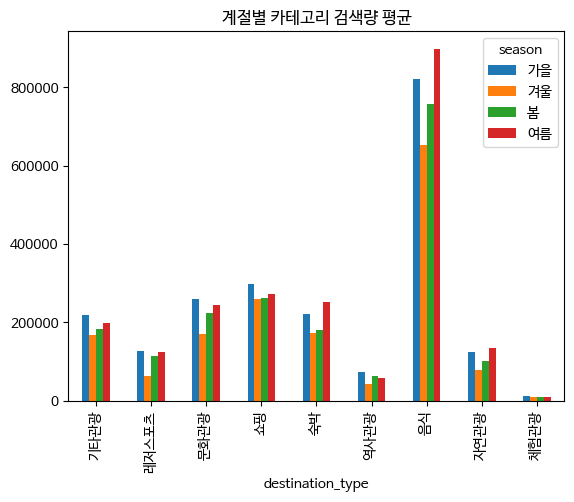

In [137]:
cate_season_mean.plot(kind='bar')
plt.title("계절별 카테고리 검색량 평균")

Text(0.5, 1.0, '계절별 카테고리 소비량 평균')

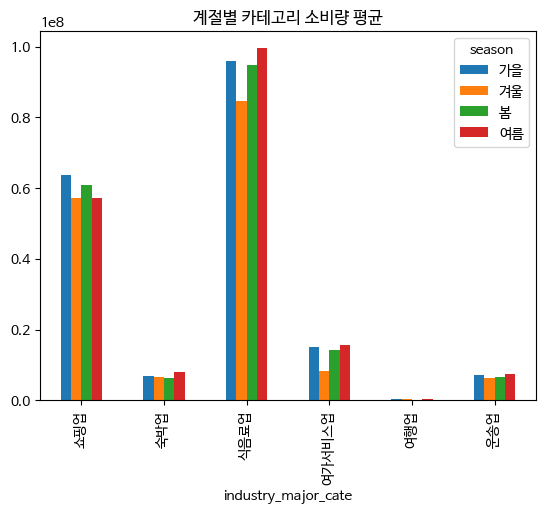

In [153]:
df_Nvisitors_mean.plot(kind='bar')
plt.title("계절별 카테고리 소비량 평균")

- 계절 전체적으로 겨울의 검색량이 적고, 가을의 검색량이 많다.   --> 가을에 여행을 많이 가고 겨울에는 비교적 적게 간다.
- 카테고리 중 음식(식음료업)의 검색량이 가장 많고, 소비량도 가장 많다.
- 레저스포츠의 경우 전체 계절 중 여름에 검색량이 많을 것으로 예상했으나 가을과 비슷함.
- 숙박, 음식, 자연관광의 경우 가을보다 여름의 검색량이 더 많다.
- 체험관광과 역사관광의 경우 선호도가 떨어진다.
- 전략 제안 : 사용자가 지역 검색 시, 지역 맛집 추천을 우선으로 한다면 어떨까? 

### 제안 2 : 지역별 여행 트렌드 선호도 분석

- 지역별 카테고리 방문자 선호도 비교: 트렌드 검색량 데이터 이용
- 해당 트렌드(카테고리)에 대한 검색량을 비교하여 선호도를 분석할 수 있습니다.

In [105]:
df_search_trend

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740
...,...,...,...,...,...,...,...
4075,65e92de0bb908e26c8044928,충북,202301,2023,1,체험,868
4076,65e92de0bb908e26c8044929,충북,202302,2023,2,미식,843
4077,65e92de0bb908e26c804492a,충북,202312,2023,12,미식,832
4078,65e92de0bb908e26c804492b,충북,202311,2023,11,미식,797


In [109]:
grouped = df_search_trend.groupby(['region', 'tour_trend'])
trend_mean = grouped['num_mention'].mean().unstack()
trend_mean

tour_trend,기타,레포츠,미식,체험,휴식/힐링
region,,,,,
강원,7945.854167,43269.416667,2984.541667,3128.708333,32012.541667
경기,18597.125000,59578.333333,6746.333333,5603.104167,63913.229167
경남,5497.333333,25842.625000,1435.250000,3019.062500,21082.562500
경북,5031.145833,19355.270833,1421.645833,3664.625000,19323.812500
광주,1280.916667,2710.729167,588.125000,324.895833,3877.583333
대구,3346.000000,6839.875000,1940.604167,663.125000,9416.416667
대전,1856.354167,3610.895833,1069.250000,440.020833,5233.687500
부산,29282.833333,20783.562500,5892.625000,2042.687500,30169.312500
서울,28778.562500,41898.354167,12212.375000,3461.875000,63587.145833


Text(0.5, 1.0, '지역별 카테고리 검색량 평균')

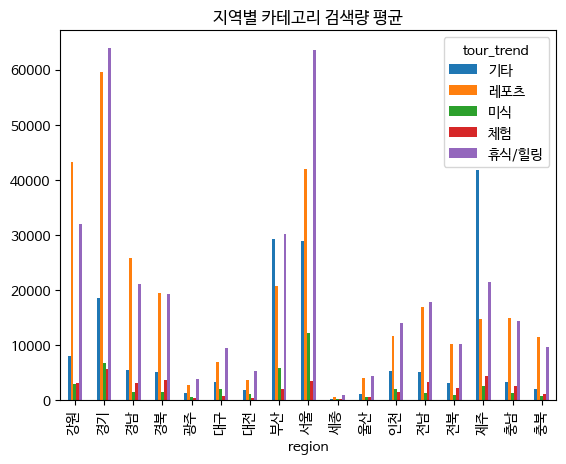

In [139]:
trend_mean.plot(kind='bar')
plt.title("지역별 카테고리 검색량 평균")

- 광주, 대구, 대전, 세종, 울산 의 경우 검색량이 적음 -> 지역 선호도가 떨어짐.
- 전체적으로 레포츠와 휴식/힐링의 검색량이 높게 나타남.
- 서울, 경기, 강원, 부산, 제주 지역의 선호도가 높음
- 부산과 제주는 기타 카테고리의 선호도가 가장 높게 나타남.
- 서울, 경기 지역에서 휴식/힐링 카테고리가 높게 나타나는 점이 의외임. -> 말 그대로 휴식/힐링이 아니라 숙소 검색까지 합친 것이라면 이해됨

- 지역마다의 검색량과 방문자 선호도 분석:
- 데이터셋에 있는 지역 정보를 기반으로 지역별 검색량과 방문자 수를 비교하여 지역마다의 선호도와 관심사를 파악할 수 있습니다.

In [119]:
df_ksearch_sum = pd.pivot_table(data=df_ksearch_date[['destination_search', 'region']]
               , index=['region'], values=['destination_search'], aggfunc= 'sum')
df_ksearch_sum

,destination_search
region,
강원,124018490
경기,475468913
경남,77370296
경북,71565241
광주,22672796
대구,43530309
대전,32832027
부산,82016182
서울,242574722


In [120]:
df_Nvisitors_sum = pd.pivot_table(data=df_Nvisitors_Date[['consumption_amount', 'region']]
               , index=['region'], values=['consumption_amount'], aggfunc= 'sum')
df_Nvisitors_sum

,consumption_amount
region,
강원,9816200523
경기,69829428441
경남,11543714988
경북,9308567062
광주,7074261055
대구,13135944797
대전,10320350306
부산,22325029778
서울,85840053815


Text(0.5, 1.0, '지역 검색량 평균')

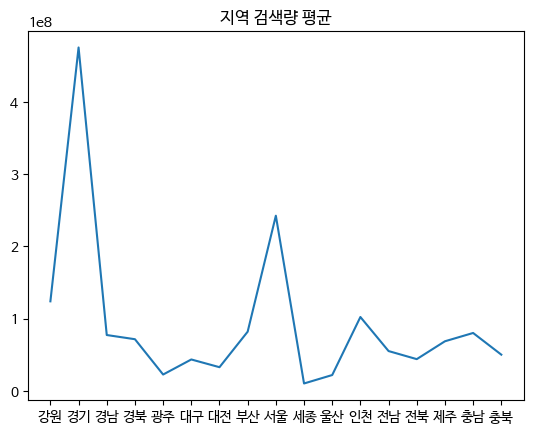

In [130]:
plt.plot(df_ksearch_sum)
plt.title("지역 검색량 평균")

Text(0.5, 1.0, '지역 방문객 소비량 평균')

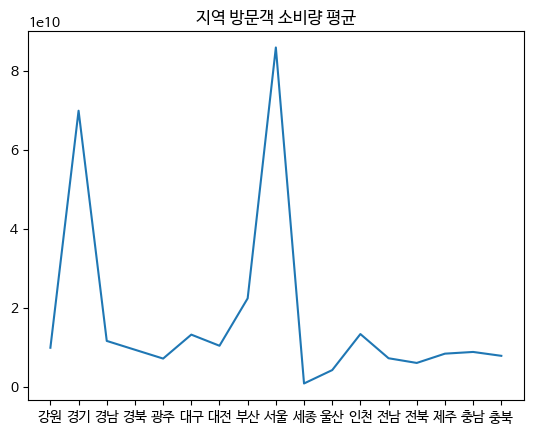

In [133]:
plt.plot(df_Nvisitors_sum)
plt.title("지역 방문객 소비량 평균")

- 경기 지역의 검색량이 가장 높은 반면 지역 소비량은 서울이 가장 높다.
- 선호도가 가장 낮은 지역 : 세종

### 제안 3 : 연도별 여행 트렌드 선호도 분석

- 연도별 소비자 행동 분석
- 문제 정의: 연도별로 소비자의 행동 변화를 파악하고 향후 전략에 반영할 수 있는 인사이트를 도출합니다.
- 배경: 시간이 지남에 따라 사용자의 관심사와 행동이 변화하기 때문에, 효율적인 타겟팅을 위해 중요한 분석입니다.
- 년도 및 월별 데이터를 활용하여 시계열 분석을 수행하여 어떤 여행 카테고리나 활동이 특정 시기에 더 인기가 있는지 예측할 수 있습니다.

In [6]:
df_search_trend

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740
...,...,...,...,...,...,...,...
4075,65e92de0bb908e26c8044928,충북,202301,2023,1,체험,868
4076,65e92de0bb908e26c8044929,충북,202302,2023,2,미식,843
4077,65e92de0bb908e26c804492a,충북,202312,2023,12,미식,832
4078,65e92de0bb908e26c804492b,충북,202311,2023,11,미식,797


In [12]:
# 연도별 평균
grouped = df_search_trend.groupby(['std_year', 'tour_trend'])
trend_mean = grouped['num_mention'].mean().unstack()
trend_mean

tour_trend,기타,레포츠,미식,체험,휴식/힐링
std_year,,,,,
2020,9036.392157,14033.818627,2224.696078,1610.431373,15063.421569
2021,7873.676471,15950.245098,2109.794118,1855.264706,17103.720588
2022,9520.210784,18641.470588,2754.632353,2332.220588,20672.225490
2023,11997.906863,23854.426471,3181.294118,3100.926471,27407.029412


Text(0.5, 1.0, '연도별 여행 트렌드 검색량 평균')

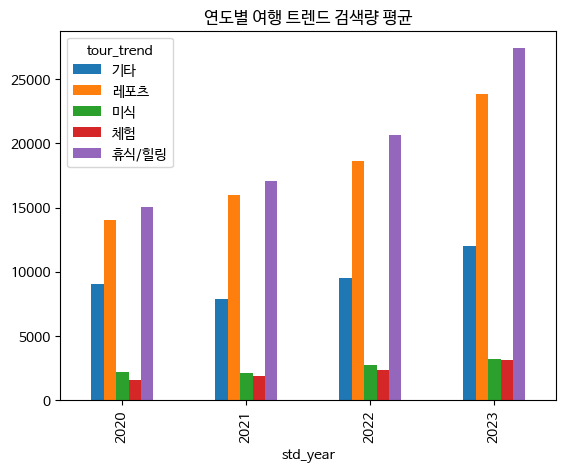

In [14]:
trend_mean.plot(kind='bar')
plt.title("연도별 여행 트렌드 검색량 평균")

- 해가 지날수록 여행에 대한 관심이 높아지고 있음.